# 1. Data Preparation:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, classification_report

In [2]:
# Description
des = pd.read_excel('heart_disease.xlsx', sheet_name='Description')
des

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [3]:
# Data
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# 2. Exploratory Data Analysis (EDA):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
print(df['exang'].unique())

[False True 'FALSE' 'TURE']


In [6]:
df['exang'] = df['exang'].replace({'FALSE': False, 'TURE': True})

### - Checking for Null Values

In [7]:
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [8]:
df.fillna(0, inplace=True)

In [9]:
# Verify that null values have been replaced
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


### - Checking for Duplicate Values

In [10]:
print(df.duplicated().sum())

1


In [11]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [12]:
# Drop duplicate row
df.drop_duplicates(inplace=True)

In [13]:
df = df.reset_index(drop=True)

In [14]:
# Verify that duplicate rows have been dropped
print(df.shape)

(907, 13)


In [15]:
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  907.000000  907.000000  907.000000  907.000000  907.000000  907.000000
mean    53.787211  133.412348  201.465270  135.976847    0.831312    1.007718
std      9.162016   20.405432  112.158285   26.813075    1.079761    1.144594
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.500000  120.000000  176.500000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.200000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [16]:
# Convert object columns to categorical
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype('category')

print(df.dtypes)

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs             bool
restecg     category
thalch         int64
exang           bool
oldpeak      float64
slope       category
thal        category
num            int64
dtype: object


### Visualize the distribution of features

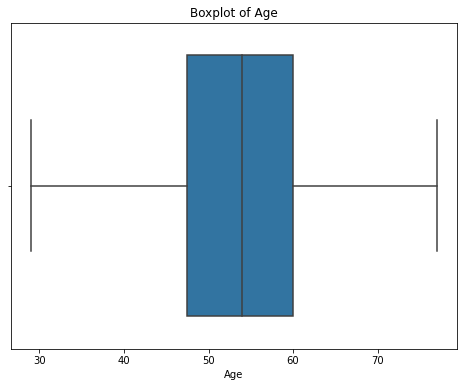

In [17]:
# Boxplot of Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


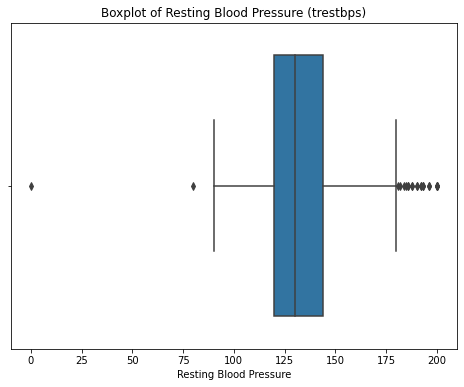

In [18]:
# Boxplot of Resting Blood Pressure (trestbps)
plt.figure(figsize=(8, 6))
sns.boxplot(x='trestbps', data=df)
plt.title('Boxplot of Resting Blood Pressure (trestbps)')
plt.xlabel('Resting Blood Pressure')
plt.show()

In [19]:
bp_out = df[(df['trestbps'] < 80) | (df['trestbps'] > 180)]
num_rows = bp_out.shape[0]
print("Number of outliers:", num_rows)

Number of outliers: 21


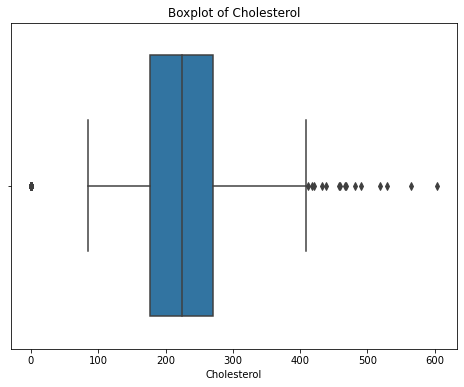

In [20]:
# Boxplot of Cholesterol
plt.figure(figsize=(8, 6))
sns.boxplot(x='chol', data=df)
plt.title('Boxplot of Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

In [21]:
chol_out = df[(df['chol'] < 100) | (df['chol'] > 420)]
chol_rows = chol_out.shape[0]
print("Number of outliers:", chol_rows)

Number of outliers: 186


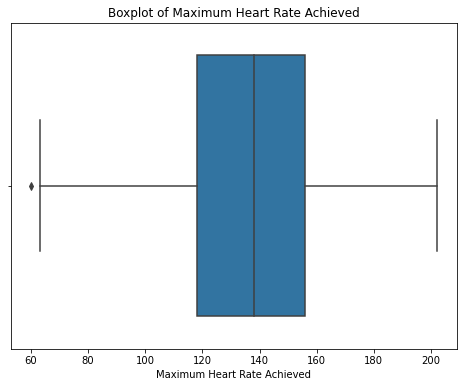

In [22]:
# Boxplot of Maximum Heart Rate Achieved
plt.figure(figsize=(8, 6))
sns.boxplot(x='thalch', data=df)
plt.title('Boxplot of Maximum Heart Rate Achieved')
plt.xlabel('Maximum Heart Rate Achieved')
plt.show()

In [23]:
thalch_out = df[(df['thalch'] < 60) | (df['thalch'] > 200)]
thalch_rows = thalch_out.shape[0]
print("Number of outliers:", thalch_rows)

Number of outliers: 1


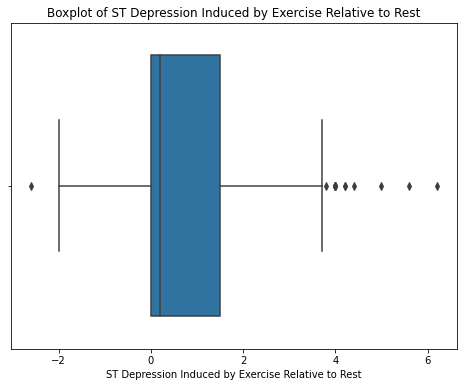

In [24]:
# Boxplot of ST Depression Induced by Exercise Relative to Rest
plt.figure(figsize=(8, 6))
sns.boxplot(x='oldpeak', data=df)
plt.title('Boxplot of ST Depression Induced by Exercise Relative to Rest')
plt.xlabel('ST Depression Induced by Exercise Relative to Rest')
plt.show()


In [25]:
old_out = df[(df['oldpeak'] < -2) | (df['oldpeak'] > 4)]
old_rows = old_out.shape[0]
print("Number of outliers:", old_rows)

Number of outliers: 7


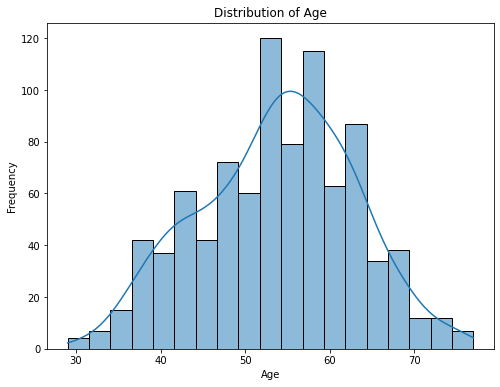

In [26]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

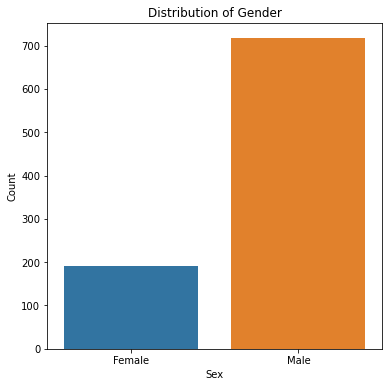

In [27]:
# Distribution of Gender
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='sex')
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

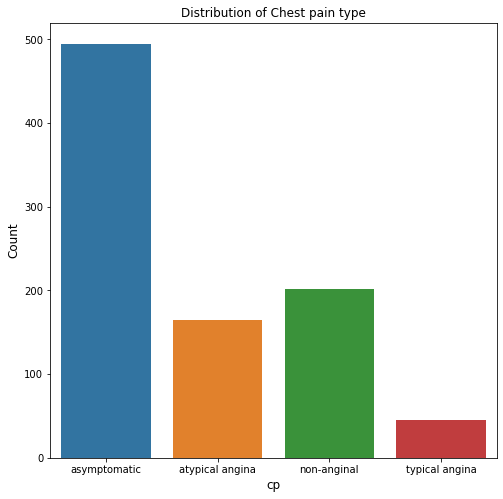

In [28]:
# Distribution of Chest pain type
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='cp')
plt.title('Distribution of Chest pain type')
plt.xlabel('cp', size=12)
plt.ylabel('Count', size=12)
plt.show()

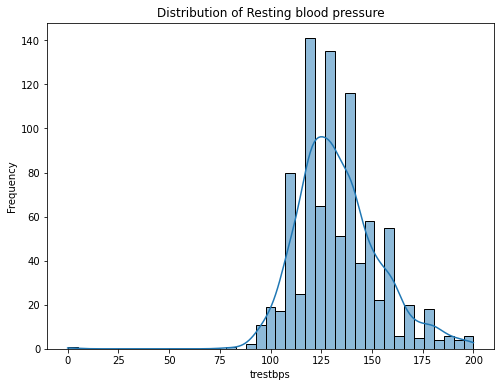

In [29]:
# Distribution of Resting blood pressure
plt.figure(figsize=(8, 6))
sns.histplot(df['trestbps'], kde=True)
plt.title('Distribution of Resting blood pressure')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.show()

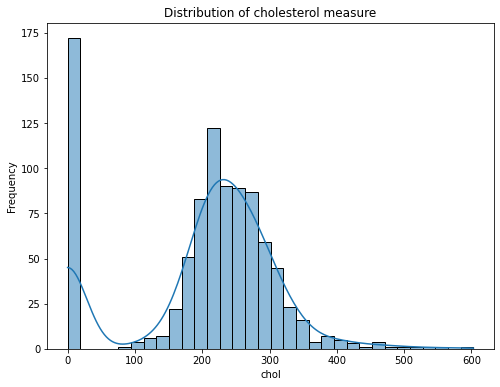

In [30]:
# Distribution of cholesterol measure
plt.figure(figsize=(8, 6))
sns.histplot(df['chol'], kde=True)
plt.title('Distribution of cholesterol measure')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()

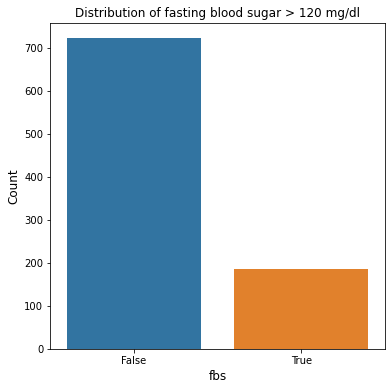

In [31]:
# Distribution of fasting blood sugar > 120 mg/dl
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='fbs')
plt.title('Distribution of fasting blood sugar > 120 mg/dl')
plt.xlabel('fbs', size=12)
plt.ylabel('Count', size=12)
plt.show()

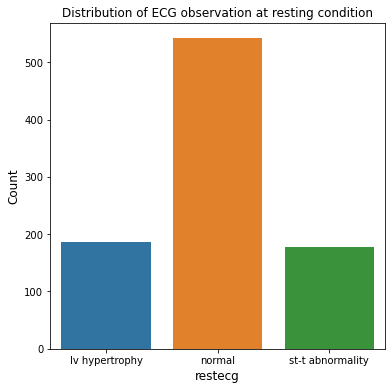

In [32]:
# Distribution of ECG observation at resting condition
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='restecg')
plt.title('Distribution of ECG observation at resting condition')
plt.xlabel('restecg', size=12)
plt.ylabel('Count', size=12)
plt.show()

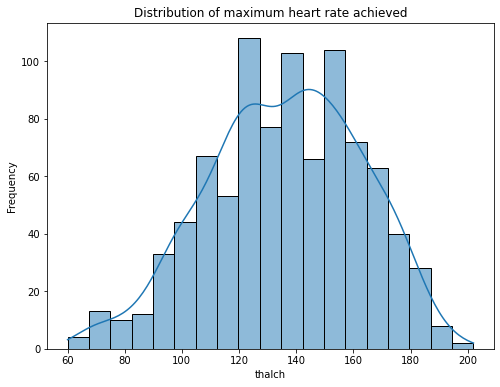

In [33]:
# Distribution of maximum heart rate achieved
plt.figure(figsize=(8, 6))
sns.histplot(df['thalch'], kde=True)
plt.title('Distribution of maximum heart rate achieved')
plt.xlabel('thalch')
plt.ylabel('Frequency')
plt.show()

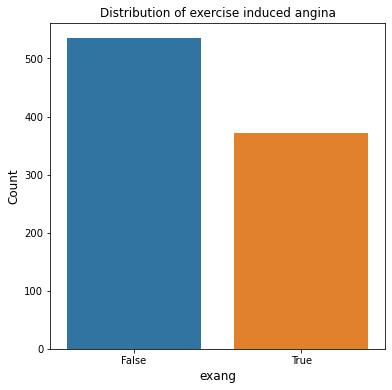

In [34]:
# Distribution of exercise induced angina
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='exang')
plt.title('Distribution of exercise induced angina')
plt.xlabel('exang', size=12)
plt.ylabel('Count', size=12)
plt.show()

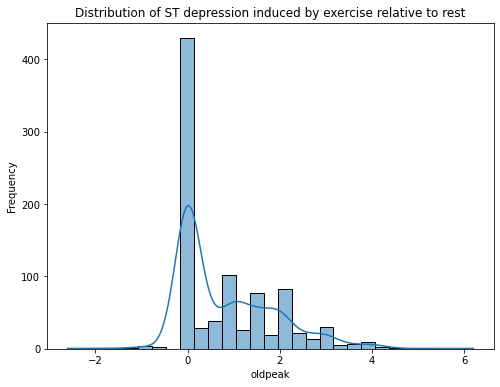

In [35]:
# Distribution of ST depression induced by exercise relative to Rest
plt.figure(figsize=(8, 6))
sns.histplot(df['oldpeak'], kde=True)
plt.title('Distribution of ST depression induced by exercise relative to rest')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

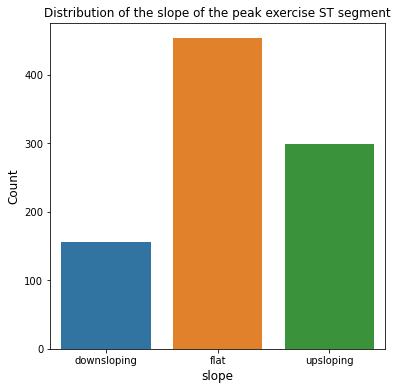

In [36]:
# Distribution of the slope of the peak exercise ST segment
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='slope')
plt.title('Distribution of the slope of the peak exercise ST segment')
plt.xlabel('slope', size=12)
plt.ylabel('Count', size=12)
plt.show()

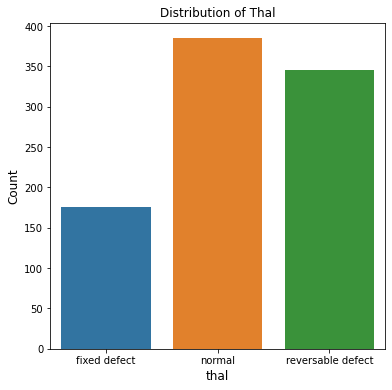

In [37]:
# Distribution of Thal
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='thal')
plt.title('Distribution of Thal')
plt.xlabel('thal', size=12)
plt.ylabel('Count', size=12)
plt.show()

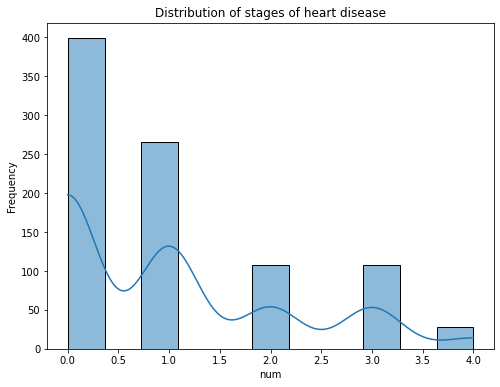

In [38]:
# Distribution of Stages of heart disease
plt.figure(figsize=(8, 6))
sns.histplot(df['num'], kde=True)
plt.title('Distribution of stages of heart disease')
plt.xlabel('num')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Correlation matrix
df.corr()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num
age,1.000000,0.253709,-0.100059,0.177004,-0.327868,0.192202,0.197285,0.326227
trestbps,0.253709,1.000000,0.117392,0.112124,-0.132841,0.151086,0.112544,0.136581
chol,-0.100059,0.117392,1.000000,-0.113651,0.198074,-0.037256,0.036281,-0.239065
fbs,0.177004,0.112124,-0.113651,1.000000,-0.065827,0.028502,-0.010630,0.156839
thalch,-0.327868,-0.132841,0.198074,-0.065827,1.000000,-0.348668,-0.091739,-0.322632
exang,0.192202,0.151086,-0.037256,0.028502,-0.348668,1.000000,0.335980,0.358837
oldpeak,0.197285,0.112544,0.036281,-0.010630,-0.091739,0.335980,1.000000,0.389011
num,0.326227,0.136581,-0.239065,0.156839,-0.322632,0.358837,0.389011,1.000000


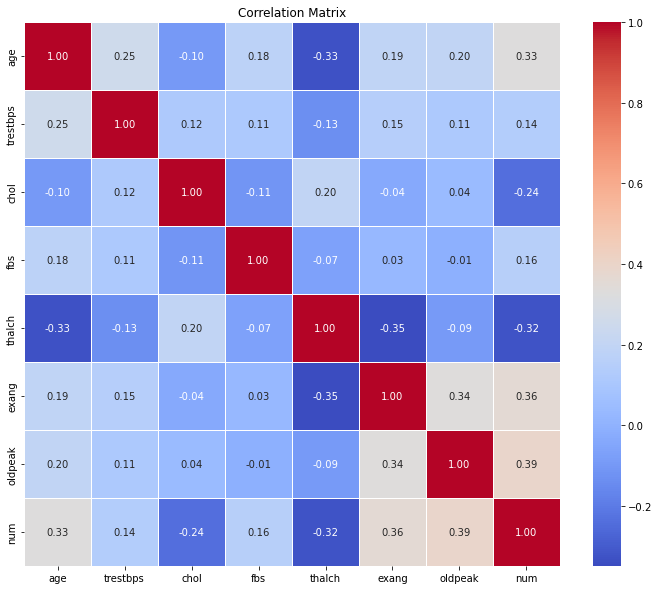

In [40]:
# heatmap displaying the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

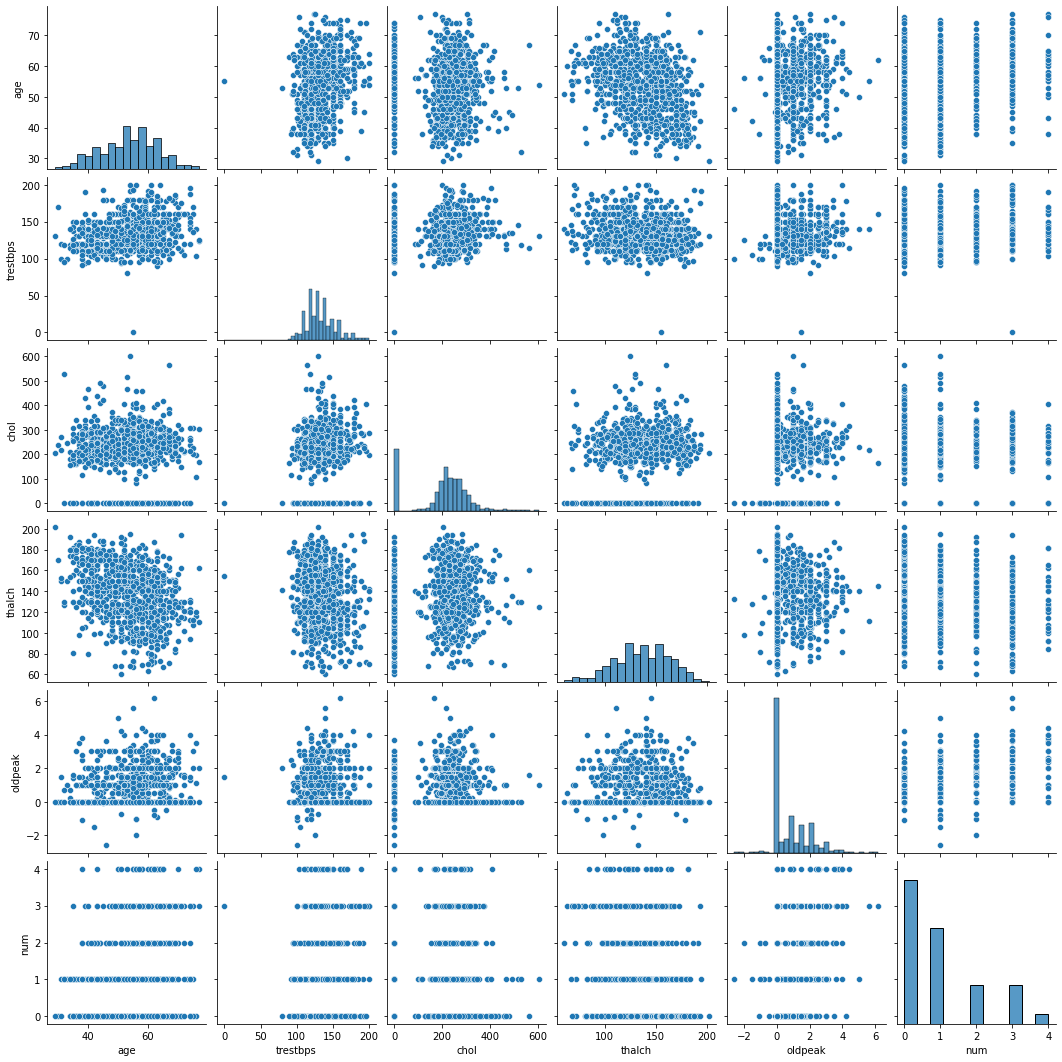

In [41]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Creating pairplot 
sns.pairplot(df[num_cols])
plt.show()

# 3. Feature Engineering:

In [42]:
df1 = df.copy()

In [43]:
numerical = ['age','trestbps', 'chol', 'thalch', 'oldpeak' ]
df_std = {}

for col in numerical:
    df_std[col] = StandardScaler()
    df1[col] = df_std[col].fit_transform(df1[numerical])

In [44]:
categorical = ['sex', 'cp', 'restecg', 'slope', 'thal', 'fbs', 'exang']
label_encoders = {}

for col in categorical:
    label_encoders[col] = LabelEncoder()
    df1[col] = label_encoders[col].fit_transform(df1[col])

In [45]:
processed_data = df1.copy()

In [46]:
processed_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006097,1,3,1.006097,1.006097,1,0,1.006097,0,1.006097,0,0,0
1,-1.396447,1,1,-1.396447,-1.396447,0,1,-1.396447,0,-1.396447,1,0,0
2,0.350858,1,0,0.350858,0.350858,0,1,0.350858,0,0.350858,1,0,0
3,-0.195175,1,3,-0.195175,-0.195175,0,0,-0.195175,0,-0.195175,1,0,0
4,0.350858,1,0,0.350858,0.350858,0,1,0.350858,1,0.350858,1,0,0


# 4. Decision Tree Classification:

In [47]:
X = processed_data.iloc[:,0:12]

In [48]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006097,1,3,1.006097,1.006097,1,0,1.006097,0,1.006097,0,0
1,-1.396447,1,1,-1.396447,-1.396447,0,1,-1.396447,0,-1.396447,1,0
2,0.350858,1,0,0.350858,0.350858,0,1,0.350858,0,0.350858,1,0
3,-0.195175,1,3,-0.195175,-0.195175,0,0,-0.195175,0,-0.195175,1,0
4,0.350858,1,0,0.350858,0.350858,0,1,0.350858,1,0.350858,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.085969,1,0,-0.085969,-0.085969,0,1,-0.085969,0,-0.085969,2,2
903,0.896890,1,0,0.896890,0.896890,0,2,0.896890,1,0.896890,1,2
904,0.241651,1,2,0.241651,0.241651,0,0,0.241651,1,0.241651,0,1
905,0.241651,1,2,0.241651,0.241651,1,2,0.241651,1,0.241651,0,0


In [49]:
y = processed_data['num']

In [50]:
y

0      0
1      0
2      0
3      0
4      0
      ..
902    4
903    4
904    4
905    4
906    4
Name: num, Length: 907, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
class_counts = y_train.value_counts()
print(class_counts)

0    310
1    218
3     90
2     88
4     19
Name: num, dtype: int64


In [53]:
class_counts = y_test.value_counts()
print(class_counts)

0    89
1    47
2    20
3    17
4     9
Name: num, dtype: int64


## 1. Building Decision tree classifier using Entropy Criteria

In [54]:
model_en = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

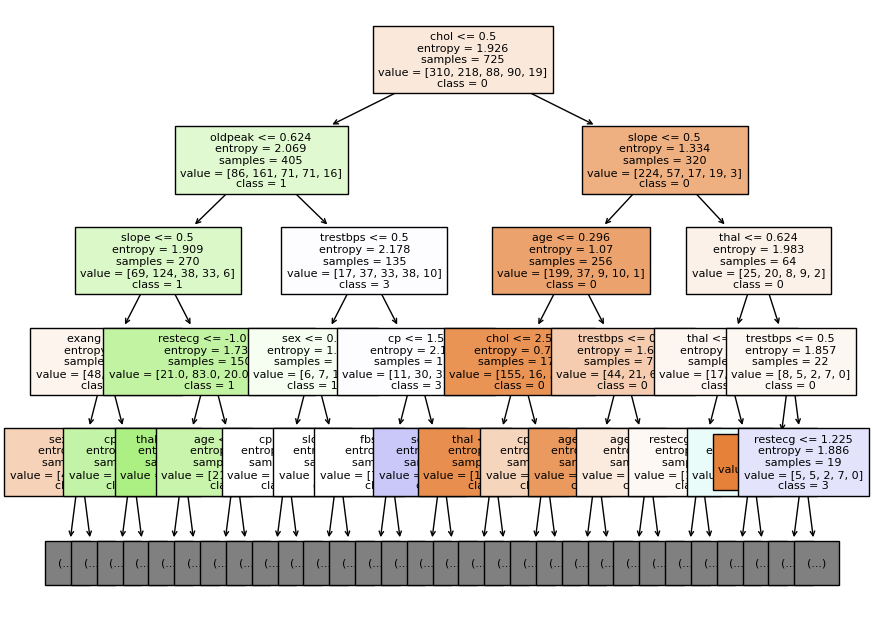

In [55]:
fn = ['age','trestbps', 'chol', 'thalch', 'oldpeak', 'sex', 'cp', 'restecg', 'slope', 'thal', 'fbs', 'exang']
cn = ['0', '1', '2', '3', '4']  

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=100)
tree.plot_tree(model_en,
               feature_names=fn,
               class_names=cn,
               filled=True,
               fontsize=8, 
               max_depth=4) 
plt.show()


In [56]:
text=tree.export_text(model_en, max_depth=4)
print(text)

|--- feature_2 <= 0.50
|   |--- feature_4 <= 0.62
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_11 <= 1.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  1.50
|   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_7 <= -1.01
|   |   |   |   |--- feature_3 <= -1.34
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  -1.34
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  -1.01
|   |   |   |   |--- feature_0 <= -0.36
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.36
|   |   |   |   |   |--- class: 1
|   |--- feature_4 >  0.62
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |---

In [57]:
model_en.feature_importances_

array([0.10547482, 0.05007773, 0.35232999, 0.02002316, 0.07111048,
       0.04789886, 0.04923999, 0.04501577, 0.13449514, 0.05892032,
       0.03066468, 0.03474906])

In [58]:
feature_imp = pd.Series(model_en.feature_importances_, index=fn).sort_values(ascending=False)

In [59]:
feature_imp

chol        0.352330
slope       0.134495
age         0.105475
oldpeak     0.071110
thal        0.058920
trestbps    0.050078
cp          0.049240
sex         0.047899
restecg     0.045016
exang       0.034749
fbs         0.030665
thalch      0.020023
dtype: float64

### Predicting on test data:

In [61]:
preds=model_en.predict(X_test)
pd.Series(preds).value_counts()

0    99
1    69
3    11
2     3
dtype: int64

In [62]:
preds

array([0, 1, 0, 3, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 3, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 3, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 3, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 3, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 3, 1, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 0])

In [63]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3
num,,,,
0,76,12,0,1
1,15,30,0,2
2,3,14,0,3
3,4,8,2,3
4,1,5,1,2


In [116]:
from sklearn.metrics import classification_report

report = classification_report(y_test, preds, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        89
           1       0.43      0.64      0.52        47
           2       0.00      0.00      0.00        20
           3       0.27      0.18      0.21        17
           4       1.00      0.00      0.00         9

    accuracy                           0.60       182
   macro avg       0.50      0.33      0.31       182
weighted avg       0.56      0.60      0.55       182



In [65]:
model_en_accuracy = np.mean(preds==y_test)
model_en_accuracy

0.5989010989010989

### 1.1 Bagging with Decision Tree Classifier using Entropy Criteria 

In [66]:
bag_model_en = BaggingClassifier(model_en)

In [67]:
bag_model_en.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=5))

In [68]:
bag_y_pred_en = bag_model_en.predict(X_test)

In [69]:
bag_en_accuracy=np.mean(bag_y_pred_en==y_test)
bag_en_accuracy

0.5824175824175825

### 1.2 AdaBoost  with Decision Tree Classifier using Entropy Criteria 

In [70]:
ada_model_en = AdaBoostClassifier(model_en, n_estimators=50, learning_rate=1.0, algorithm='SAMME' )

In [71]:
ada_model_en.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=5))

In [72]:
ada_y_pred_en = ada_model_en.predict(X_test)

In [73]:
ada_en_accuracy= np.mean(ada_y_pred_en==y_test)
ada_en_accuracy

0.5659340659340659

## 2. Building Decision Tree Classifier using Gini Criteria

In [74]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

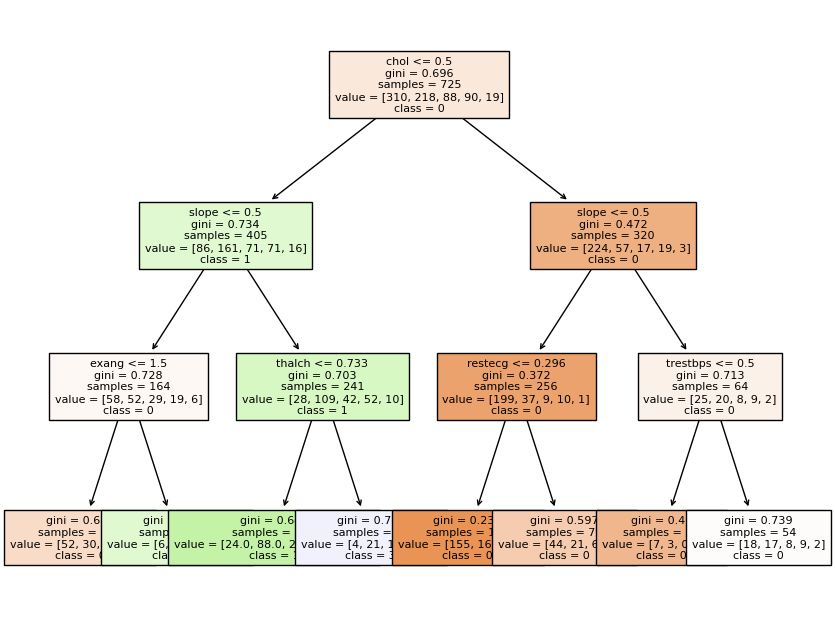

In [75]:
fn = ['age','trestbps', 'chol', 'thalch', 'oldpeak', 'sex', 'cp', 'restecg', 'slope', 'thal', 'fbs', 'exang']
cn = ['0', '1', '2', '3', '4']  

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=100)
tree.plot_tree(model_gini,
               feature_names=fn,
               class_names=cn,
               filled=True,
               fontsize=8, 
               max_depth=3) 
plt.show()


### Predictions and Computing the accuracy

In [76]:
pred = model_gini.predict(X_test)

In [77]:
model_gini.feature_importances_

array([0.        , 0.01627252, 0.58502008, 0.06740105, 0.        ,
       0.        , 0.        , 0.07486355, 0.19047166, 0.        ,
       0.        , 0.06597114])

In [78]:
pd.crosstab(y_test,pred)

col_0,0,1,3
num,,,
0,80,8,1
1,18,24,5
2,6,11,3
3,6,9,2
4,3,5,1


In [79]:
model_gini_accuracy=np.mean(pred==y_test)
model_gini_accuracy

0.5824175824175825

### 2.1 Bagging with Decision Tree Classifier using Gini Criteria 

In [80]:
bag_model_gini = BaggingClassifier(model_gini)

In [81]:
bag_model_gini.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3))

In [82]:
bag_y_pred_gini = bag_model_gini.predict(X_test)

In [83]:
bag_gini_accuracy=np.mean(bag_y_pred_gini==y_test)
bag_gini_accuracy

0.6098901098901099

### 2.2 AdaBoost  with Decision Tree Classifier using Gini Criteria 

In [84]:
ada_model_gini = AdaBoostClassifier(model_gini, n_estimators=50, learning_rate=1.0, algorithm='SAMME' )

In [85]:
ada_model_gini.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3))

In [86]:
ada_y_pred_gini = ada_model_gini.predict(X_test)

In [87]:
ada_gini_accuracy=np.mean(ada_y_pred_gini==y_test)
ada_gini_accuracy

0.5879120879120879

## 3. Building Decision Tree Regression Model

In [88]:
rmodel = DecisionTreeRegressor(max_depth=3)
rmodel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [119]:
rpreds = rmodel.predict(X_test)

In [89]:
rmodel.score(X_test, y_test)

0.2782072042991405

In [90]:
rmodel.score(X_train, y_train)

0.29913449184855434

In [112]:
base_r2_score = rmodel.score(X_test, y_test)
print("Base Decision Tree R-squared score:", base_r2_score)

Base Decision Tree R-squared score: 0.2782072042991405


### 3.1 Bagging with Decision Tree Regression 

In [92]:
bagging_regressor = BaggingRegressor(rmodel, n_estimators=10, random_state=42)

In [93]:
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3), random_state=42)

In [94]:
bag_reg_y_pred = bagging_regressor.predict(X_test)

In [95]:
bag_r2_score = r2_score(y_test, bag_reg_y_pred)
print("Bagging Regressor R-squared score:", bag_r2_score)

Bagging Regressor R-squared score: 0.30510120671769114


### 3.2 AdaBoost with Decision Tree Regression 

In [96]:
adaboost_regressor = AdaBoostRegressor(rmodel, n_estimators=50, random_state=42)

In [97]:
adaboost_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), random_state=42)

In [98]:
ada_y_pred = adaboost_regressor.predict(X_test)

In [99]:
adaboost_r2_score = r2_score(y_test, ada_y_pred)
print("AdaBoost Regressor R-squared score:", adaboost_r2_score)

AdaBoost Regressor R-squared score: 0.2904777948420688


# 5. Hyperparameter Tuning:

In [100]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11],
}

In [101]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [103]:
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [104]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11]},
             scoring='accuracy')

In [105]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3}


In [106]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Accuracy on testing set:", test_accuracy)

Accuracy on testing set: 0.5824175824175825


# 6. Model Evaluation and Analysis:

## 1. Decision tree classifier using Entropy Criteria

In [117]:
from sklearn.metrics import classification_report

report_en = classification_report(y_test, preds, zero_division=1)
print(report_en)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        89
           1       0.43      0.64      0.52        47
           2       0.00      0.00      0.00        20
           3       0.27      0.18      0.21        17
           4       1.00      0.00      0.00         9

    accuracy                           0.60       182
   macro avg       0.50      0.33      0.31       182
weighted avg       0.56      0.60      0.55       182



In [108]:
print("Accuracy for Decision tree classifier using Entropy Criteria:", model_en_accuracy)
print("Accuracy for BaggingClassifier with DTC using Entropy Criteria::", bag_en_accuracy)
print("Accuracy for AdaBoostClassifier with DTC using Entropy Criteria::", ada_en_accuracy)

Accuracy for Decision tree classifier using Entropy Criteria: 0.5989010989010989
Accuracy for BaggingClassifier with DTC using Entropy Criteria:: 0.5824175824175825
Accuracy for AdaBoostClassifier with DTC using Entropy Criteria:: 0.5659340659340659


## 2. Decision Tree Classifier using Gini Criteria

In [118]:
from sklearn.metrics import classification_report

report_gini = classification_report(y_test, pred, zero_division=1)
print(report_gini)

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        89
           1       0.42      0.51      0.46        47
           2       1.00      0.00      0.00        20
           3       0.17      0.12      0.14        17
           4       1.00      0.00      0.00         9

    accuracy                           0.58       182
   macro avg       0.66      0.31      0.28       182
weighted avg       0.63      0.58      0.52       182



In [109]:
print("Accuracy for Decision tree classifier using Gini Criteria:", model_gini_accuracy)
print("Accuracy for BaggingClassifier with DTC using Gini Criteria::", bag_gini_accuracy)
print("Accuracy for AdaBoostClassifier with DTC using Gini Criteria::", ada_gini_accuracy)

Accuracy for Decision tree classifier using Gini Criteria: 0.5824175824175825
Accuracy for BaggingClassifier with DTC using Gini Criteria:: 0.6098901098901099
Accuracy for AdaBoostClassifier with DTC using Gini Criteria:: 0.5879120879120879


## 3. Decision Tree Regression Model

In [113]:
print("Base Decision Tree R-squared score:", base_r2_score)
print("Bagging Regressor R-squared score:", bag_r2_score)
print("AdaBoost Regressor R-squared score:", adaboost_r2_score)

Base Decision Tree R-squared score: 0.2782072042991405
Bagging Regressor R-squared score: 0.30510120671769114
AdaBoost Regressor R-squared score: 0.2904777948420688


## Important Features:

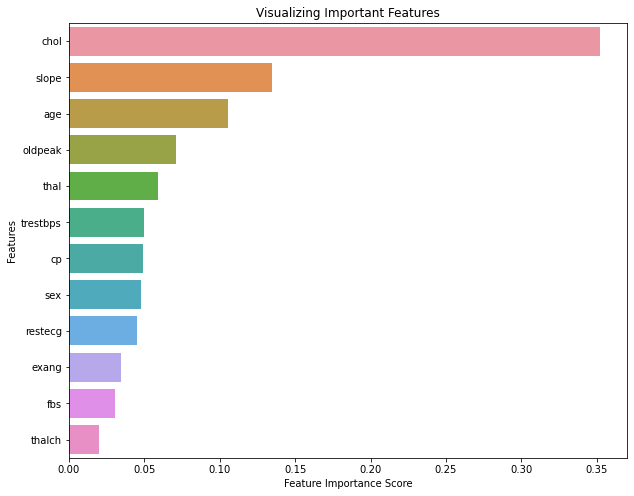

In [115]:
# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# --- END ---